In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
page_length = pd.read_csv('../data/page_length.txt',header=None, delimiter='\t')
page_length.columns = ['title','length']

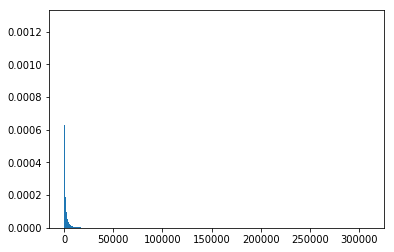

In [3]:
plt.hist(page_length.length,bins='auto',density=True)
plt.show()

In [4]:
titles = page_length.title.astype(str).tolist()
list_page = [t for t in titles if 'List of ' in str(t)]
disambiguation_page = [t for t in titles if '(disambiguation)' in t]
short_page = page_length[page_length.length <= 500].title.astype(str).tolist()

In [5]:
print('list page:', len(list_page), 'disambiguation page:', len(disambiguation_page), 'short page:', len(short_page))

list page: 105546 disambiguation page: 21718 short page: 2127812


In [6]:
invalid = set(list_page + disambiguation_page + short_page)

In [7]:
print('total invalid page:', len(invalid))

total invalid page: 2165556


In [8]:
with open('../data/invalid.txt', 'w+') as f:
    f.write('\n'.join(invalid))
f.close()